In [614]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd


# ACTIVITY 6

In [615]:

Data_Ana = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')
Data_Ana_Clean = Data_Ana.drop(['Unnamed: 0'], axis = 1)
Data_Ana_Clean

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,26794,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,64811,...,40,2,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


## 1. One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 4. ( Hint: check Dropfirst option).

In [616]:
categorical_data = Data_Ana_Clean.select_dtypes('object')
categorical_data

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [617]:
dummy_data = pd.get_dummies(categorical_data, drop_first=True)
dummy_data

# drop_first= remove the pointless columns from the dummy to reduce data

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0


## 2. for the first iteration, we will focus on the numericals data (numericals data frame) as our data source.

In [618]:
numerical_data_withOUT = Data_Ana_Clean._get_numeric_data()
numerical_data_withOUT
#withOUT indicates with ouliers

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,26794,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,15,31,1,7,707
...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [619]:
# customer_lifetime_value = numerical_data['customer_lifetime_value']
# income = numerical_data['income']
# monthly_premium_auto = numerical_data['monthly_premium_auto']
# months_since_last_claim = numerical_data['months_since_last_claim']
# months_since_policy_inception = numerical_data['months_since_policy_inception']## 3. remove the outliers from the numerical columns.


# from scipy.stats import scoreatpercentile as pct
# from scipy.stats import iqr

# def remove_outliers_costum():
#     pct_75 = pct(customer_lifetime_value, 75)  # Calculate percentile 75 using scipy function scoreatpercentile
#    pct_25 = pct(customer_lifetime_value, 25)  # Calculate percentile 25 using scipy function scoreatpercentile
#    upper_bound = pct_75 + 1.5*iqr(customer_lifetime_value)  # iqr - > Scipy function to calculate the Interquartile Range
#    lower_bound = pct_25 - 1.5*iqr(customer_lifetime_value)
#    customer_lifetime_value2 = customer_lifetime_value[(customer_lifetime_value <= upper_bound) & (customer_lifetime_value >= lower_bound)]  # Filter out the outliers
#    return customer_lifetime_value2


# remove_outliers_costum()

# NOTE: this works for only singular columns


In [620]:
# this is for removing the ouliers from all the columns.

Q1 = numerical_data_withOUT.quantile(0.25)
Q3 = numerical_data_withOUT.quantile(0.75)
IQR = Q3 - Q1

numerical_data = numerical_data_withOUT[~((numerical_data_withOUT < (Q1 - 1.5 * IQR)) |(numerical_data_withOUT > (Q3 + 1.5 * IQR))).any(axis=1)]

numerical_data

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
1,2228,26794,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
5,4745,50549,61,2,73,0,7,292
7,4956,87197,63,35,45,0,3,247
8,5989,66839,154,33,24,0,1,739
...,...,...,...,...,...,...,...,...
10674,6232,28334,83,3,44,0,7,537
10676,9075,37722,116,8,23,0,8,158
10677,5807,62447,74,9,2,0,7,133
10680,4547,33531,116,11,15,0,1,801


In [621]:
# or simimlarly we can take only the non-outliers values:

# numerical_data = numerical_data[((numerical_data > (Q1 - 1.5 * IQR)) |(numerical_data < (Q3 + 1.5 * IQR))).any(axis=1)]


In [622]:
# checkup of some values

print(numerical_data['number_of_open_complaints'].unique())

[0]


## 4. check if there are highly correlated features and drop them if there are any.


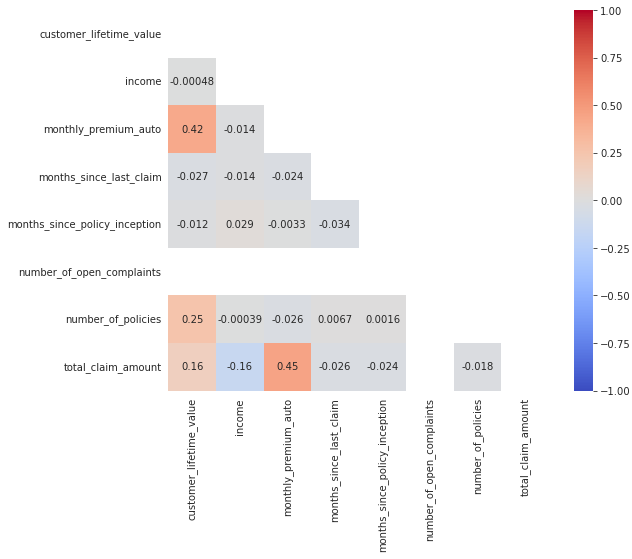

In [623]:

corr = numerical_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)
    

# RESULT: there are no correlations.

## 5. X-y split (y is the target variable which is the total claim amount)

In [624]:


# first I create a data frame with 
#. X= all numerical data without the target ('total_claim_amount') and 
#. y= total_claim_amount.


# axis=1  is the X axes and axis=0 is the Y axes.



In [625]:
X = numerical_data.drop('total_claim_amount', axis=1)
y = numerical_data.total_claim_amount

X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
1,2228,26794,64,3,26,0,1
2,14947,22139,100,34,31,0,2
5,4745,50549,61,2,73,0,7
7,4956,87197,63,35,45,0,3
8,5989,66839,154,33,24,0,1
...,...,...,...,...,...,...,...
10674,6232,28334,83,3,44,0,7
10676,9075,37722,116,8,23,0,8
10677,5807,62447,74,9,2,0,7
10680,4547,33531,116,11,15,0,1


In [626]:
y

1        744
2        480
5        292
7        247
8        739
        ... 
10674    537
10676    158
10677    133
10680    801
10685    273
Name: total_claim_amount, Length: 6890, dtype: int64

## Train / Test Split - ACTIVITY 7

In [627]:

# Now we split the data in TEST and TRAIN sets (in agreement with Hila and Fra  ;)   ).

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30,random_state=123)

### test size is the percentage of data taken as test_set (30% test and 70% training, in this case).
### you can also write 'train_size =.70' .
### random_state = any number you put is the same. this function keep always the same random choice of data taken as sets.
###                otherwise it takes always different values when you run it.

# check rows and columns
X_train.shape



(4823, 7)

In [628]:
X_test.shape

(2067, 7)

## Finding the parameters (mean, variance, from the training set) - ACTIVITY 6

## Standardize the data (after the data split) - ACTIVITY 7
Standardize the data (after the data split). (done above).
Standardize the Data is necessary to bring all the Data to the same levels (to reduce the variables) to be compared each other.
(indicateed below as x_test_scaled or x_train_scaled).

In [629]:


std_scaler = StandardScaler().fit(X_train)   # it calculates the z score.

X_train_scaled = std_scaler.transform(X_train)   # transforming the data: normalization of all data. 


X_test_scaled = std_scaler.transform(X_test)

In [630]:

# check rows and columns
X_train.shape

(4823, 7)

In [631]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[ 0.91053014  1.51095817 -0.55216437 ... -1.55848241  0.
  -0.34524607]
 [ 2.4409858  -0.89474489  1.49766192 ...  0.64492256  0.
  -0.34524607]
 [ 0.66907781  0.78753607 -0.59771607 ... -1.20309451  0.
  -0.34524607]
 ...
 [-1.02077411 -1.04694725 -0.64326776 ... -0.06585324  0.
  -0.81909974]
 [ 1.63111444 -0.68375346  0.54107632 ...  1.2135432   0.
  -0.34524607]
 [-0.44229457  0.96867212  1.36100684 ...  1.14246562  0.
  -0.81909974]]
--------
[[ 1.04760464  1.73288989 -0.05109572 ... -0.74109025  0.
  -0.34524607]
 [-1.00128186 -1.20247579 -0.59771607 ...  1.35569836  0.
  -0.81909974]
 [-0.88369961 -1.04855023 -0.18775081 ...  0.75153893  0.
  -0.81909974]
 ...
 [-0.68846276  1.04685717  0.54107632 ... -0.49231872  0.
  -0.81909974]
 [ 0.43800039 -0.15617469  0.35886954 ...  0.89369409  0.
   0.60246127]
 [-0.31307984  0.75335266 -1.00768133 ...  1.60446989  0.
   2.02402229]]


# ACTIVITY 7

In [632]:
X.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies'],
      dtype='object')

In [633]:
# Modeling using Statsmodels

X_train_const_scaled = sm.add_constant(X_train_scaled)     # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled)       # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     249.7
Date:                Fri, 15 Apr 2022   Prob (F-statistic):          8.94e-279
Time:                        11:44:22   Log-Likelihood:                -31911.
No. Observations:                4823   AIC:                         6.384e+04
Df Residuals:                    4816   BIC:                         6.388e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        382.9818      2.605    147.004      0.0

In [634]:
predictions_test

array([318.61877333, 366.06570012, 402.36767425, ..., 412.93332227,
       411.73905513, 265.82324404])

### R-SQUARED VALUE

In [635]:
# display adjusted R-squared
# difference between the model and the real values (the training data set).
# to check the validity of the model.

print(model.rsquared_adj)

0.2363286115294887


## Apply linear regression.

In [636]:
# (This is a Supervised Training. So you need the X_train_scaled (all standardized training data) and the values used as target, which are the y_train).


model = LinearRegression()            # model
model.fit(X_train_scaled, y_train)    # model train



LinearRegression()

In [637]:
model.coef_

array([ -9.87136673, -30.91952654,  98.90062386,  -4.17159728,
        -4.85445902,   0.        ,   2.056006  ])

In [638]:
model.intercept_

382.9817540949616

In [639]:
# then you get the following model that can predict new data.
# NOTE: the values in the equation below come from the model.coef_ and the model.intercept_  

# target_donation = 1.34* avg_fam_income  -0.41 * pobc2   +5.45 * avggift  -0.48 * med_home_val_transformed  + 15.66

In [640]:
# the following 'predict function' is running the equation that is above (the model for predict new data).

y_pred=model.predict(X_test_scaled)          # model prediction

y_pred_train=model.predict(X_train_scaled)

In [641]:
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
1,2228,26794,64,3,26,0,1
2,14947,22139,100,34,31,0,2
5,4745,50549,61,2,73,0,7
7,4956,87197,63,35,45,0,3
8,5989,66839,154,33,24,0,1
...,...,...,...,...,...,...,...
10674,6232,28334,83,3,44,0,7
10676,9075,37722,116,8,23,0,8
10677,5807,62447,74,9,2,0,7
10680,4547,33531,116,11,15,0,1


## Model Interpretation.

In [676]:
y_test

4081    408
4129    518
3604    393
3311    292
6058    494
       ... 
1767    133
1579    355
5111    470
7737    134
7967    107
Name: total_claim_amount, Length: 2067, dtype: int64

In [677]:
y_pred

array([318.61877333, 366.06570012, 402.36767425, ..., 412.93332227,
       411.73905513, 265.82324404])

In [678]:
residual = y_test - y_pred
residual

4081     89.381227
4129    151.934300
3604     -9.367674
3311    -64.046353
6058     57.046578
           ...    
1767   -220.556043
1579     -3.324711
5111     57.066678
7737   -277.739055
7967   -158.823244
Name: total_claim_amount, Length: 2067, dtype: float64

In [679]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

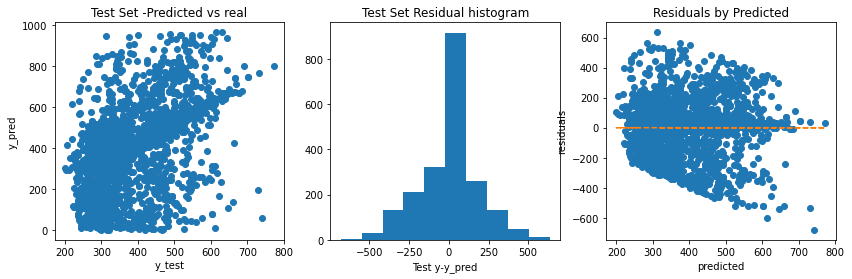

In [680]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(residual)        ## residual = (y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,residual,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

# Explanation of the graphs are in the file: 'Notebook_Code_Along_Intro_To_Pandas_Healthcare For_All_Modeling'.

In [681]:
# note: when a model is really good:
####   - first graph: model works in prediction when it result a linear regression between the predict and the test values.
####   - second graph: histogram; perfect if normal distribution of the errors (y_test-y_pred).
####   - last graph: plotting the 'residuals' with the 'predict', more the values are around the line more it means that the residuals (errors) are zero (zero difference between prediction and real values), and more the model is good.



## Seaborn alternative to check the linear regression model

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

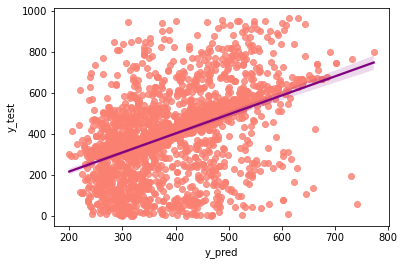

In [682]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "salmon"}, line_kws={"color": "purple"})

## MSE: Mean Squared Error
## MAE: Mean Absolute Error
## RMSE: Root Mean Square Error 

In [683]:
# Predictions on the test set

print(mse(y_test,y_pred))
print(mae(y_test,y_pred))
print(np.sqrt(mse(y_test,y_pred)))   ## in Seaborn doesn't exist RMSE so we calculate it with numpy.

33825.902423098145
134.12563929995397
183.91819492126967


In [684]:
# Prediction on the train set

mse(y_train,y_pred_train)

32687.868624834595

In [685]:
mae(y_train,y_pred_train)

132.9959128516345

In [686]:
## if the errors in train and test sets are similar the models are ok.

# R2: Sample R-Squared

R2: Sample R-Squared
- Provides a way to compare the performance of several models
- Provides a measurement of the “explanatory” power of a model (shows how much variance of y can be explained by the independent features) 
- Compares the variance of your model’s errors against the “mean model” (model for which all the predictions are the mean of the dependent variable)
- Increases with every independent feature you add
- more the R2 value is close to 1 and more the model is perfect.


note: see presentation week4 day2 (Linear Regression).

R^2 = (SST - SSE)/SST


R^2 = 1-SSE/SST

more the R2 value is close to 1 and more the model is perfect.

SSE = sum of the square of the errors
SST = total sum of squares explained by the model

In [687]:
R2=r2_score(y_test,y_pred)
R2

0.2078894971199502

In [688]:
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)

ValueError: X has 7 features, but LinearRegression is expecting 108 features as input.

In [ ]:
R2_test

In [ ]:
R2_train

### adjusted R2:

Provides a measurement of the “explanatory” power of a model taking into account the number of independent features used by the model.
Only increases if the inclusion of a new feature improves the model’s performance.
- it is used for Sklearn since it doesn't have R2.


In [ ]:
adjusted_R2_test = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adjusted_R2_test


# Feature Importances
#### it helps to check which variable is more affecting the model. It means, when little changes of the variable bring bigger changes to the result of the model equation.

In [ ]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [ ]:
features_importances

In [ ]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

# Activity 7.2 - Prediction Model merging categorical and numerical data first.

In [ ]:
# repeat all the work above but merging the categorical-dummy data and the numerical data and create the prediction model.

merge_num_cat = pd.concat([dummy_data,numerical_data_withOUT], axis=1)

merge_num_cat


# axis=1 because you merge by columns. x=0 to merge by rows.


## splitting data train and test

In [ ]:
X1 = merge_num_cat.drop('total_claim_amount', axis=1)
y1 = merge_num_cat.total_claim_amount

X1

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.30,random_state=123)
X1_train.shape

In [ ]:
X1_test.shape

## standardize data

In [ ]:


std_scaler = StandardScaler().fit(X1_train)   # it calculates the z score.

X1_train_scaled = std_scaler.transform(X1_train)   # transforming the data: normalization of all data. 


X1_test_scaled = std_scaler.transform(X1_test)

## Modeling using Statsmodels

In [ ]:


X1_train_const_scaled = sm.add_constant(X1_train_scaled)     # adding a constant

model = sm.OLS(y1_train, X1_train_const_scaled).fit()
predictions_train = model.predict(X1_train_const_scaled) 

X1_test_const_scaled = sm.add_constant(X1_test_scaled)       # adding a constant
predictions_test = model.predict(X1_test_const_scaled) 
print_model = model.summary()
print(print_model)

In [ ]:
predictions_test

In [ ]:
print(model.rsquared_adj)

## linear regression

In [693]:

model = LinearRegression()            # model
model.fit(X1_train_scaled, y1_train)    # model train


LinearRegression()

In [694]:
model.coef_

array([ 2.72195595e+00,  5.05668937e-02,  3.02464030e+00, -9.11545859e+00,
       -5.28495049e+00, -4.06560525e+00, -3.59679973e+00, -3.57338695e+00,
        2.40270101e+00, -3.15248524e+00, -9.36864977e-01, -1.25763588e+00,
       -7.80233744e-01,  3.11248365e+00, -1.44039412e+00, -8.88331399e-01,
       -1.15687202e+00, -2.10158495e+00, -1.11620123e+00, -2.05666002e+00,
        1.03352663e+00,  9.01478498e-01, -2.19098490e+00,  2.50449279e-01,
       -2.39371355e+00, -3.44227108e+00, -6.03566023e-01,  1.44953029e+00,
        3.06934267e-01, -5.32011011e-01,  2.57792944e+00,  1.85222863e+00,
       -1.44298466e+00, -3.47824267e+00, -7.97116144e-01,  8.75436783e-01,
       -2.79499716e-01, -2.31569062e+00, -1.12717514e+00, -2.81862035e+00,
       -8.40079347e+12, -8.55670116e+12, -8.73984339e+12, -8.40079347e+12,
       -7.60473964e+12, -8.88935346e+12, -7.49889795e+12, -8.07927782e+12,
       -7.39145161e+12, -7.98011853e+12, -8.55670116e+12, -8.27379293e+12,
       -7.60473964e+12, -

In [695]:
model.intercept_

433.08141832130735

In [696]:
y1_pred=model.predict(X1_test_scaled)          # model prediction

y1_pred_train=model.predict(X1_train_scaled)

In [697]:
X1

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,4809,48029,61,7,52,0,9
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,2228,26794,64,3,26,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,14947,22139,100,34,31,0,2
3,0,1,0,1,1,0,1,0,0,0,...,0,1,0,22332,49078,97,10,3,0,2
4,0,1,0,0,0,1,0,0,0,0,...,0,1,0,9025,23675,117,15,31,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,0,1,0,15563,64811,253,8,40,2,7
10685,0,1,0,0,0,0,1,0,0,0,...,0,1,0,5259,61146,65,7,68,0,6
10686,0,0,0,0,1,0,0,0,0,0,...,0,1,0,23893,39837,201,11,63,0,2
10687,0,0,1,0,0,1,1,0,0,0,...,0,1,0,11971,64195,158,0,27,4,6


In [698]:
R2=r2_score(y1_test,y1_pred)
R2

0.7708008213620849

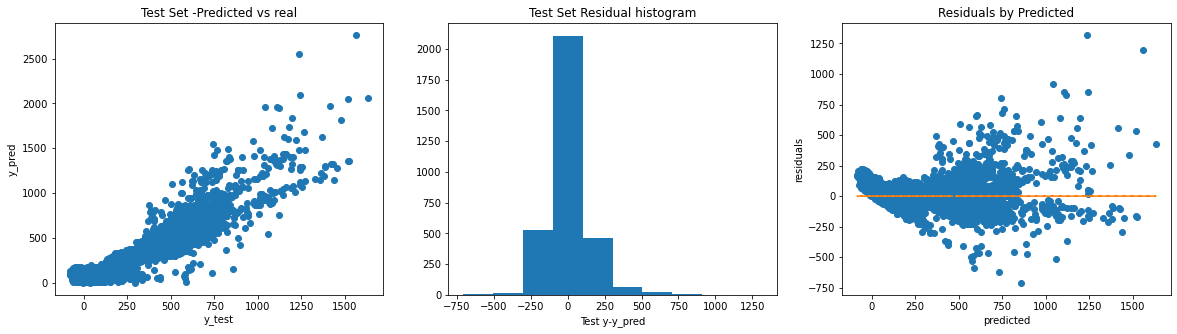

In [700]:
## Check the model

residual1 = y1_test - y1_pred

result1=pd.DataFrame({"y_test":y1_test,"y_pred":y1_pred})

fig1, ax1 = plt.subplots(1,3,figsize=(20,5))
ax1[0].plot(y1_pred, y1_test, 'o')
ax1[0].set_xlabel("y_test")
ax1[0].set_ylabel("y_pred")
ax1[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax1[1].hist(residual1)                  ## residual = (y_test - y_pred)
ax1[1].set_xlabel("Test y-y_pred")
ax1[1].set_title("Test Set Residual histogram")

ax1[2].plot(y1_pred,residual1,"o")
ax1[2].set_xlabel("predicted")
ax1[2].set_ylabel("residuals")
ax1[2].set_title("Residuals by Predicted")
ax1[2].plot(y1_pred,np.zeros(len(y1_pred)),linestyle='dashed')

# Explanation of the graphs are in the file: 'Notebook_Code_Along_Intro_To_Pandas_Healthcare For_All_Modeling'.